In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

GOLDEN_RATIO = 0.5*(1+np.sqrt(5))
FIGURE_HEIGHT = 5
FIGURE_WIDTH = FIGURE_HEIGHT*GOLDEN_RATIO
DEFAULT_FIGSIZE = (FIGURE_WIDTH, FIGURE_HEIGHT)

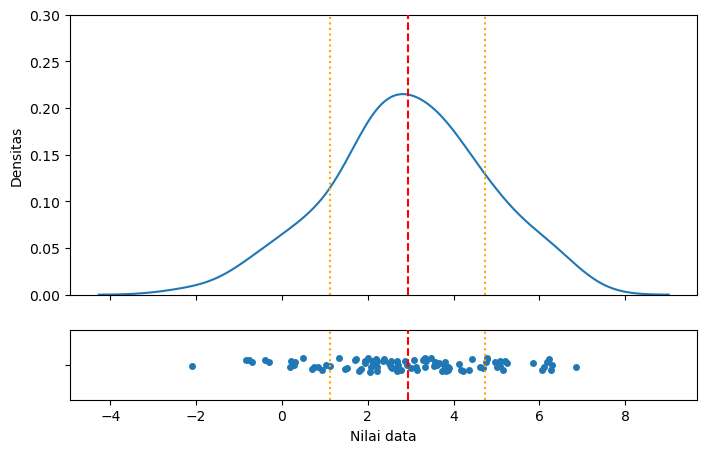

In [2]:
# Membuat data 1 dimensi
np.random.seed(42)
x = np.random.normal(loc=3.141, scale=2.0, size=100)

# Calculate the mean and standard deviation
x_mean = np.mean(x)
x_std = np.std(x)

f, (ax_kde, ax_strip) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": (.80, .20)}, figsize=DEFAULT_FIGSIZE)

# Plot stripplot and histogram
sns.kdeplot(x=x, ax=ax_kde)
sns.stripplot(x=x, ax=ax_strip)

# Plot the location of the mean
ax_kde.axvline(x=x_mean, ls='--', color='r', zorder=3)
ax_kde.axvline(x=(x_mean+x_std), ls=':', color='orange', zorder=3)
ax_kde.axvline(x=(x_mean-x_std), ls=':', color='orange', zorder=3)

ax_strip.axvline(x=x_mean, ls='--', color='r', zorder=3)
ax_strip.axvline(x=(x_mean+x_std), ls=':', color='orange', zorder=3)
ax_strip.axvline(x=(x_mean-x_std), ls=':', color='orange', zorder=3)

# Misc
ax_kde.set_ylim(0., 0.3)
ax_kde.set_ylabel('Densitas')
ax_strip.set_xlabel('Nilai data')

plt.savefig('img/1d_data.png', facecolor='white', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

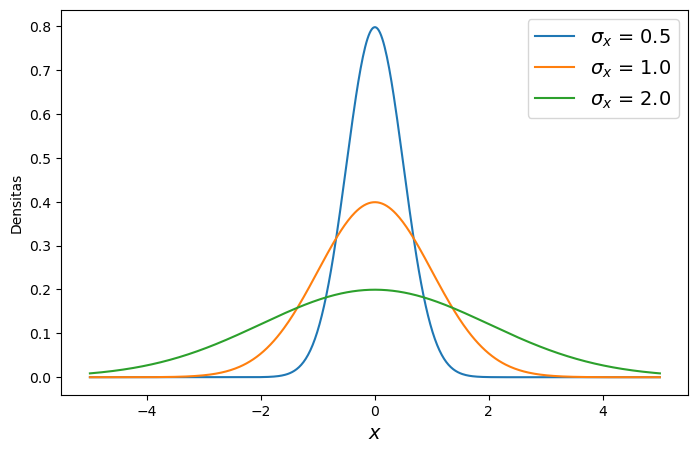

In [7]:
# Membandingkan nilai variansi
x = np.linspace(-5., 5., 500)
y_1 = sp.stats.norm.pdf(x, loc=0., scale=.5)
y_2 = sp.stats.norm.pdf(x, loc=0., scale=1.)
y_3 = sp.stats.norm.pdf(x, loc=0., scale=2.)

# Plot data
f, ax = plt.subplots(1, figsize=DEFAULT_FIGSIZE)
ax.plot(x, y_1, label=r'$\sigma_x$ = 0.5')
ax.plot(x, y_2, label=r'$\sigma_x$ = 1.0')
ax.plot(x, y_3, label=r'$\sigma_x$ = 2.0')
ax.legend(fontsize=14)

# Misc
ax.set_ylabel('Densitas')
ax.set_xlabel('$x$', fontsize=14)

plt.savefig('img/various_sigma.png', facecolor='white', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

Estimasi nilai m: 2.85
Estimasi nilai b: 2.12


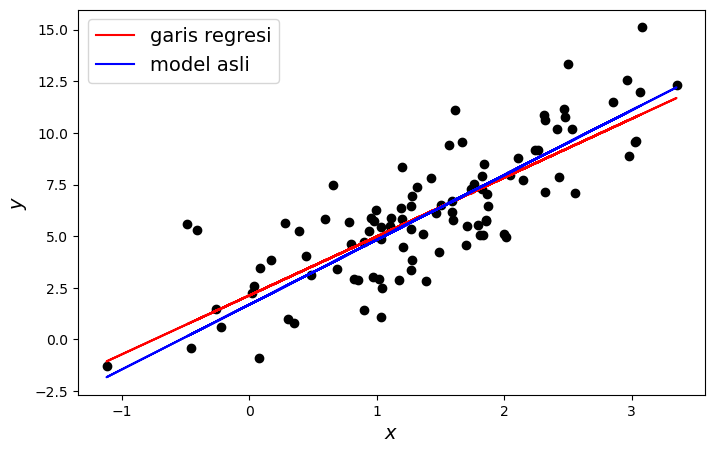

In [173]:
import numpy as np

np.random.seed(42)

# Definisikan fungsi asli
def linear_model(x, b, m):
    return b + m*x 

# Generate nilai x (diambil dari distribusi normal agar memusat)
x_mean = 1.5   # nilai tengah x
x_std = 1.0    # sebaran x
N = 100        # jumlah data
x_data = np.random.normal(loc=x_mean, scale=x_std, size=N)

# Definisikan nilai b dan m yang digunakan serta sebaran intrinsik
b_true = 1.68
m_true = 3.14
sig_true = 2.0
# Generate nilai y
y_data = linear_model(x_data, b_true, m_true)
# Menambahkan galat/perbedaan dari fungsi asli
y_data += np.random.normal(scale=sig_true, size=N)

# Hitung variabel-variabel yang diperlukan
sum_xi = np.sum(x_data)
sum_xi2 = np.sum(x_data**2)
sum_yi = np.sum(y_data)
sum_xiyi = np.sum(x_data*y_data)
x_mean = np.mean(x_data)
y_mean = np.mean(y_data)

# Hitung nilai m dan b
m_est = (N*sum_xiyi-sum_xi*sum_yi)/(N*sum_xi2-(sum_xi)**2)
b_est = y_mean - m_est*x_mean
print(f'Estimasi nilai m: {round(m_est, 2)}')
print(f'Estimasi nilai b: {round(b_est, 2)}')

# Plot hasilnya
f, ax = plt.subplots(1, figsize=DEFAULT_FIGSIZE)
ax.scatter(x_data, y_data, color='k')
ax.plot(x_data, linear_model(x_data, b_est, m_est), label='garis regresi', color='r')
ax.plot(x_data, linear_model(x_data, b_true, m_true), label='model asli', color='b')

ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$y$', fontsize=14)
ax.legend(fontsize=14)

plt.savefig('img/regression_result.png', facecolor='white', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

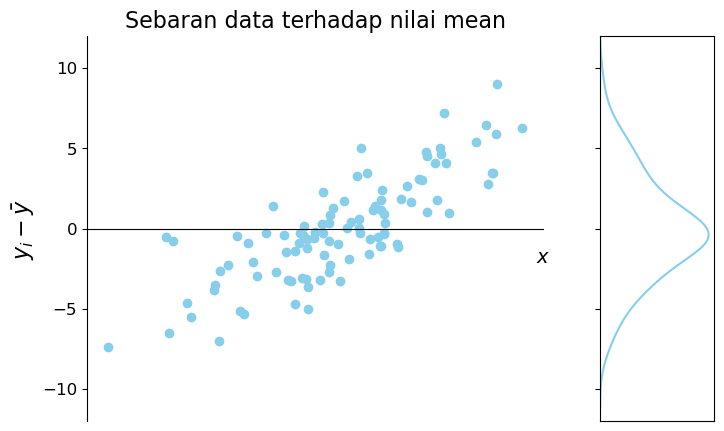

In [170]:
# Hitung selisih titik data terhadap nilai mean
delta_y_mean = y_data - y_mean

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,
                                gridspec_kw={"width_ratios": (.80, .20)}, figsize=DEFAULT_FIGSIZE)

# Move bottom x-axis to centre
ax1.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

# Plot scatter around the mean
ax1.scatter(x_data, delta_y_mean, color="skyblue")
ax1.set_ylim(-12., 12.)
# Plot kde
sns.kdeplot(y=delta_y_mean, color="skyblue", ax=ax2)

# Misc
ax1.set_xlabel(r'$x$', fontsize=14)
ax1.xaxis.set_label_coords(1., 0.45)
ax1.set_ylabel(r'$y_i - \bar{y}$', fontsize=16)
ax1.set_title('Sebaran data terhadap nilai mean', fontsize=16)
ax1.tick_params(axis='y', which='major', labelsize=12)
ax1.set_xticks([])
ax2.set_xlabel('')
ax2.set_xticks([])

plt.savefig('img/delta_y_mean.png', facecolor='white', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

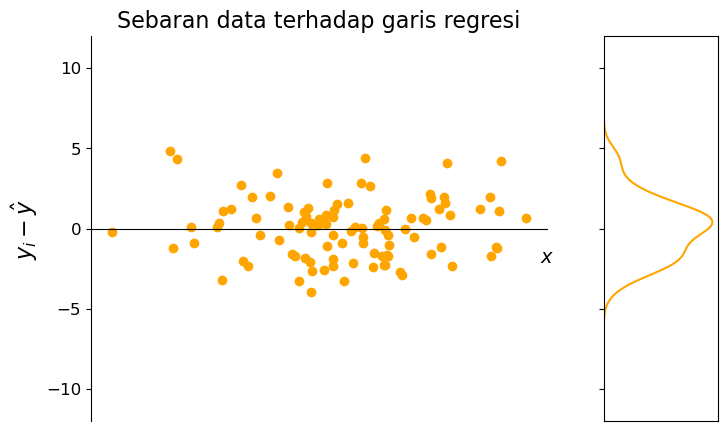

In [171]:
# Hitung selisih titik data terhadap nilai estimasi
delta_y_reg = y_data - linear_model(x_data, b_est, m_est)

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,
                                gridspec_kw={"width_ratios": (.80, .20)}, figsize=DEFAULT_FIGSIZE)

# Move bottom x-axis to centre
ax1.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

# Plot scatter around the mean
ax1.scatter(x_data, delta_y_reg, color="orange")
ax1.set_ylim(-12., 12.)
# Plot kde
sns.kdeplot(y=delta_y_reg, color="orange", ax=ax2)

# Misc
ax1.set_xlabel(r'$x$', fontsize=14)
ax1.xaxis.set_label_coords(1., 0.45)
ax1.set_ylabel(r'$y_i - \hat{y}$', fontsize=16)
ax1.set_title('Sebaran data terhadap garis regresi', fontsize=16)
ax1.tick_params(axis='y', which='major', labelsize=12)
ax1.set_xticks([])
ax2.set_xlabel('')
ax2.set_xticks([])

plt.savefig('img/delta_y_reg.png', facecolor='white', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

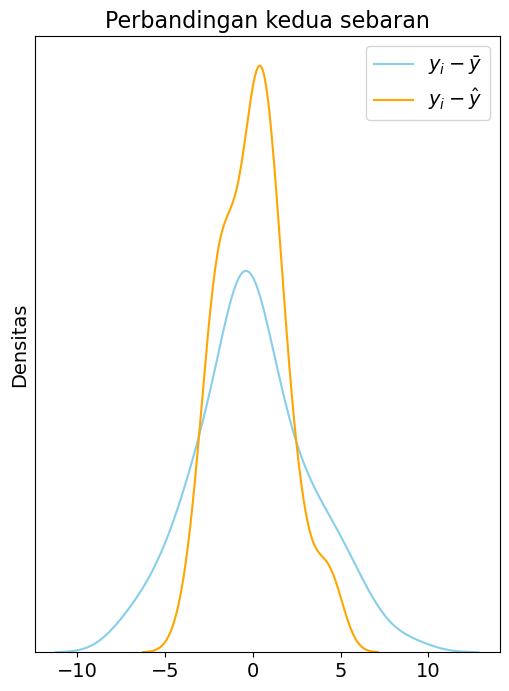

In [172]:
fig, ax = plt.subplots(figsize=(6, 8))

sns.kdeplot(x=delta_y_mean, label=r'$y_i-\bar{y}$', ax=ax, color='skyblue')
sns.kdeplot(x=delta_y_reg, label=r'$y_i-\hat{y}$', ax=ax, color='orange')
plt.legend(fontsize=14)

ax.set_yticks([])
ax.set_ylabel('Densitas', fontsize=14)
ax.tick_params(axis='x', which='major', labelsize=14)
ax.set_title('Perbandingan kedua sebaran', fontsize=16)

plt.savefig('img/spread_mean_reg.png', facecolor='white', transparent=False, dpi=300, bbox_inches='tight')

plt.show()